In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import os 

In [5]:
import matplotlib.pyplot as plt

In [6]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)

In [10]:
from os import listdir

folder_path = "D:\\CEEW\\Solar Net Meter Data"  

csv_files = [f for f in listdir(folder_path) if f.endswith('.csv')]

dataframes = []

for file in csv_files:
    month = file.replace('.csv', '')  
    
    df = pd.read_csv(f"{folder_path}/{file}")
    df['Month'] = month 
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv(f"{folder_path}/Solar Net Meter Data.csv", index=False)

print("Merged all CSVs and added 'Month' column successfully.")

Merged all CSVs and added 'Month' column successfully.


In [38]:
file_path = "D:\\CEEW\\Solar Net Meter Data.csv"
df = pd.read_csv(file_path)


HP_TO_KW = 0.7457


df.loc[df['catcode'].isin([3, 4, 5]), 'load'] *= HP_TO_KW

df.to_csv("converted_Solar Net Meter Data.csv", index=False)

print(df[df['catcode'].isin([3, 4, 5])][['catcode', 'load']].head())

     catcode       load
103        3  18.456075
174        3  38.589975
291        3  44.742000
354        3  25.726650
392        3  27.740040


In [8]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)

circle_units = df.groupby("circle")["units"].sum().sort_values(ascending=False)

print(circle_units.head(10))

circle
HABSIGUDA            45159356
MEDCHAL              43643144
CYBERCITY            38444912
SAROORNAGAR          30636402
BANJARA HILLS        29380701
SECUNDERABAD         23830448
RAJENDRA NAGAR       18210097
HYDERABAD CENTRAL    16796441
SANGAREDDY           14532085
HYDERABAD SOUTH      10273463
Name: units, dtype: int64


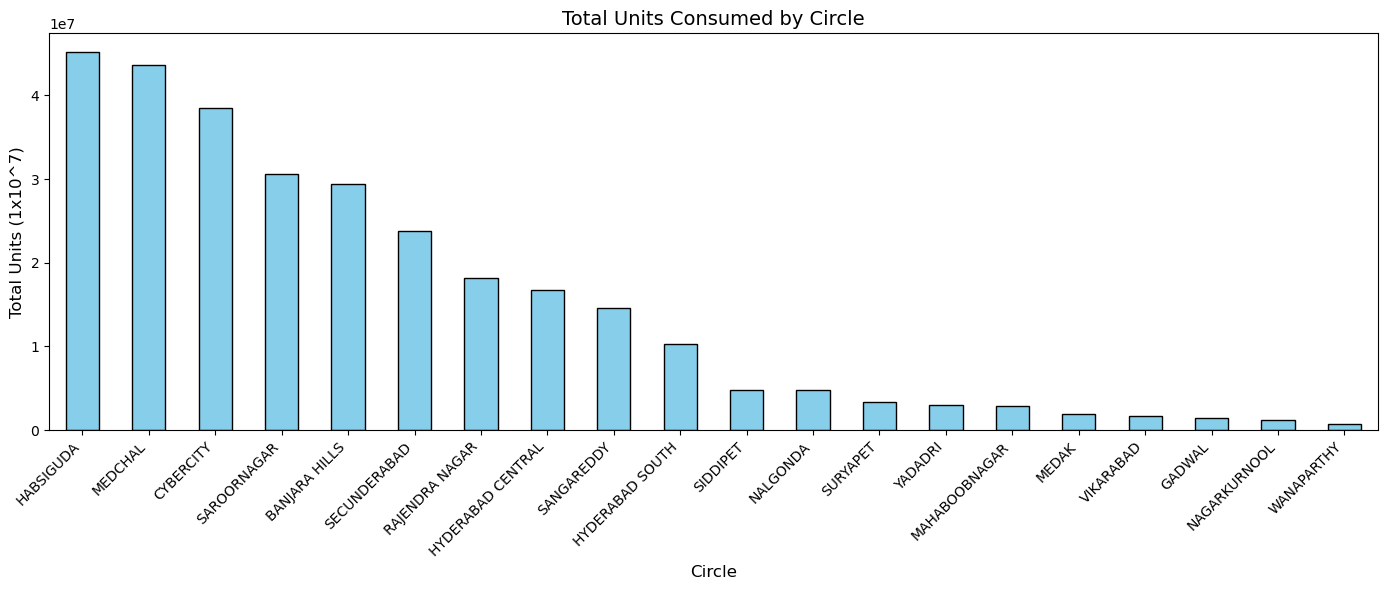

In [25]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)

circle_units = df.groupby("circle")["units"].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
circle_units.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Total Units Consumed by Circle", fontsize=14)
plt.xlabel("Circle", fontsize=12)
plt.ylabel("Total Units (1x10^7)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("circle_vs_units.png")
plt.show()

In [48]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)


density_df = df.groupby("circle").agg({
    "units": "sum",
    "totservices": "sum",
    "load": "sum"
}).reset_index()


density_df["units_per_service"] = density_df["units"] / density_df["totservices"]


density_df_sorted = density_df.sort_values(by="units_per_service", ascending=False)


print(density_df_sorted.head(10))

               circle     units  totservices          load  units_per_service
18         WANAPARTHY    737758         1333  1.853496e+04         553.456864
6       MAHABOOBNAGAR   2918311         5611  7.293441e+04         520.105329
7               MEDAK   1884500         3740  5.374494e+04         503.877005
1           CYBERCITY  38444912        81560  9.112464e+05         471.369691
10           NALGONDA   4785592        10762  1.303803e+05         444.674967
0       BANJARA HILLS  29380701        67799  1.069969e+06         433.350064
4   HYDERABAD CENTRAL  16796441        39563  4.351594e+05         424.549225
15           SIDDIPET   4837547        11516  1.325793e+05         420.071813
16           SURYAPET   3333579         8078  9.193180e+04         412.673805
9        NAGARKURNOOL   1197170         2914  3.730223e+04         410.833905


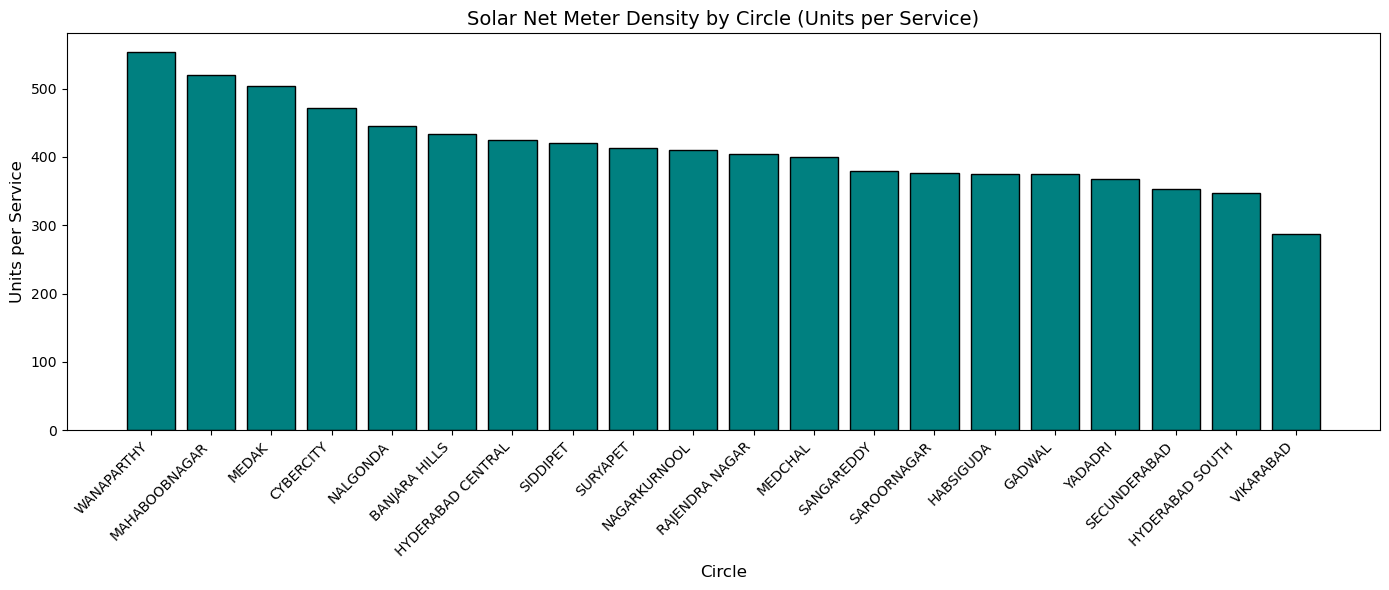

In [26]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)

density_df = df.groupby("circle").agg({
    "units": "sum",
    "totservices": "sum",
    "load": "sum"
}).reset_index()

density_df["units_per_service"] = density_df["units"] / density_df["totservices"]

density_df_sorted = density_df.sort_values(by="units_per_service", ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(
    density_df_sorted["circle"],
    density_df_sorted["units_per_service"],
    color="teal",
    edgecolor="black"
)


plt.title("Solar Net Meter Density by Circle (Units per Service)", fontsize=14)
plt.xlabel("Circle", fontsize=12)
plt.ylabel("Units per Service", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("Solar Net Meter_density_by_circle.png")


plt.show()

In [45]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)


df = df.dropna(subset=['units'])


avg_units_per_circle = df.groupby('circle')['units'].mean().reset_index()


avg_units_per_circle.columns = ['Circle', 'Average_Units_Consumed']


avg_units_per_circle = avg_units_per_circle.sort_values(by='Average_Units_Consumed', ascending=False)


print(avg_units_per_circle)

               Circle  Average_Units_Consumed
0       BANJARA HILLS             4953.751644
14       SECUNDERABAD             3073.310291
8             MEDCHAL             2803.568061
1           CYBERCITY             2655.585549
11     RAJENDRA NAGAR             1795.513410
3           HABSIGUDA             1666.519891
12         SANGAREDDY             1373.413193
4   HYDERABAD CENTRAL             1339.642766
13        SAROORNAGAR             1139.111433
6       MAHABOOBNAGAR             1136.413941
5     HYDERABAD SOUTH             1090.716955
2              GADWAL             1010.042657
16           SURYAPET              860.278452
10           NALGONDA              815.401602
15           SIDDIPET              814.813374
18         WANAPARTHY              745.210101
7               MEDAK              736.708366
9        NAGARKURNOOL              655.983562
19            YADADRI              494.559167
17          VIKARABAD              493.911054


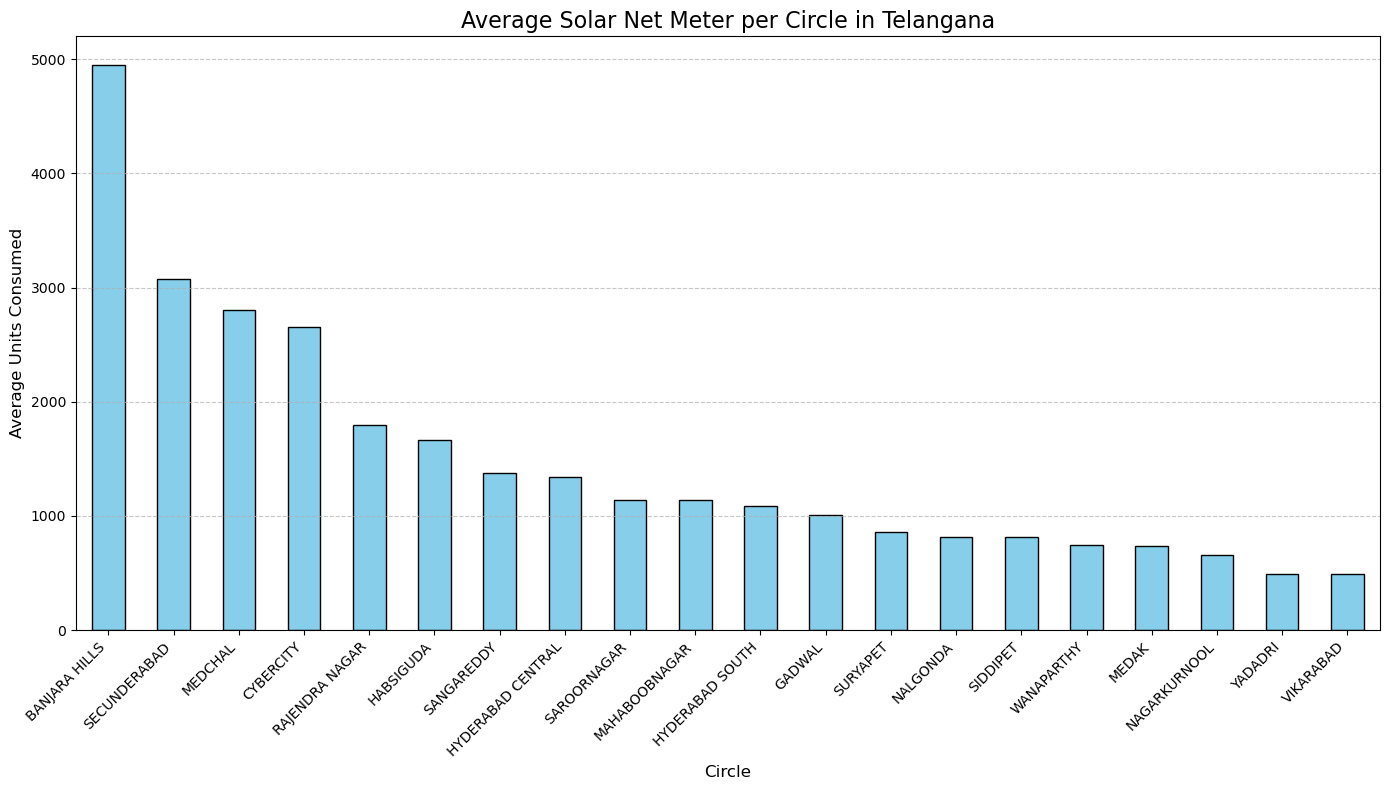

In [27]:
file_path = "C:\\Users\\adity\\Downloads\\CEEW Project\\converted_Solar Net Meter Data.csv"
df = pd.read_csv(file_path)


df = df.dropna(subset=['units'])


avg_units = df.groupby('circle')['units'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 8))
avg_units.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Solar Net Meter per Circle in Telangana', fontsize=16)
plt.xlabel('Circle', fontsize=12)
plt.ylabel('Average Units Consumed', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("Average Solar Net Meter per Circle.png")
plt.show()

<Figure size 1600x1000 with 0 Axes>

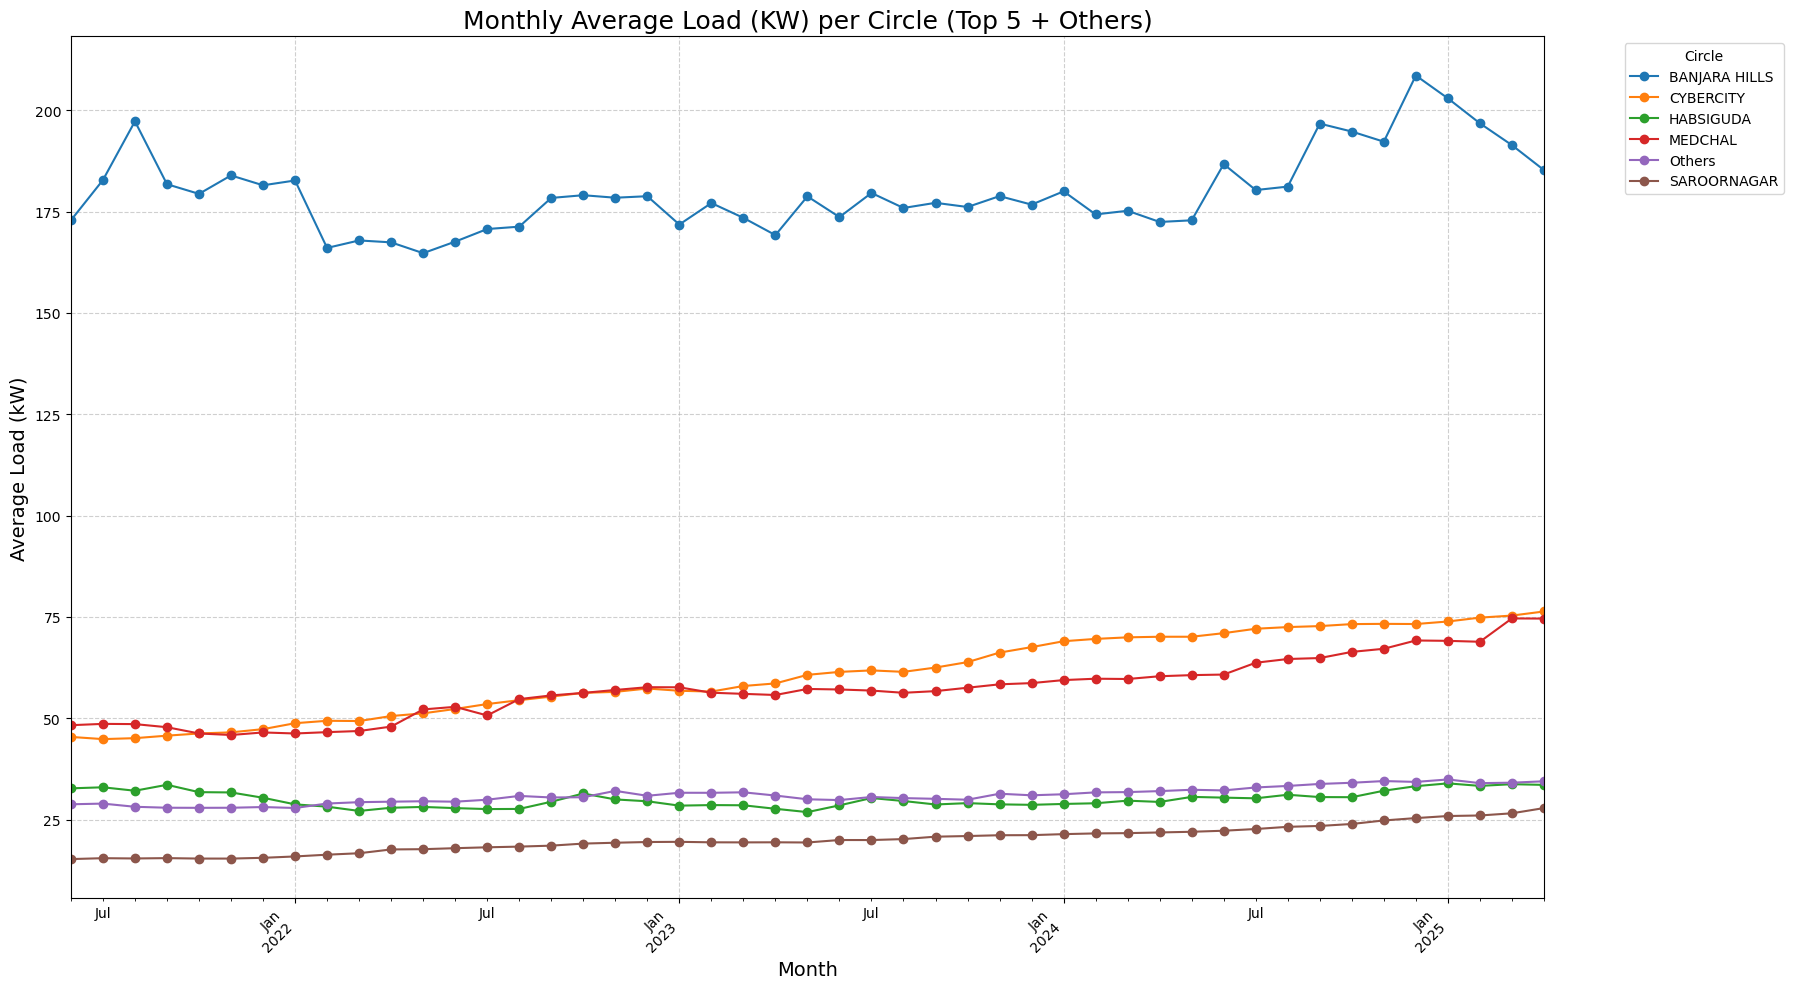

In [29]:
df['Month'] = pd.to_datetime(df['Month'], format='%B %Y')
df = df.dropna(subset=['load'])

top_circles = df.groupby('circle')['load'].sum().nlargest(5).index.tolist()

df['circle_grouped'] = df['circle'].apply(lambda x: x if x in top_circles else 'Others')

monthly_avg_load = df.groupby(['Month', 'circle_grouped'])['load'].mean().reset_index()

pivot_avg_load = monthly_avg_load.pivot(index='Month', columns='circle_grouped', values='load')

plt.figure(figsize=(16, 10))
pivot_avg_load.plot(marker='o', figsize=(18, 10))

plt.title('Monthly Average Load (KW) per Circle (Top 5 + Others)', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Load (kW)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Circle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("Monthly_Average_Load_Top5_vs_Others.png")
plt.show()


<Figure size 1600x1000 with 0 Axes>

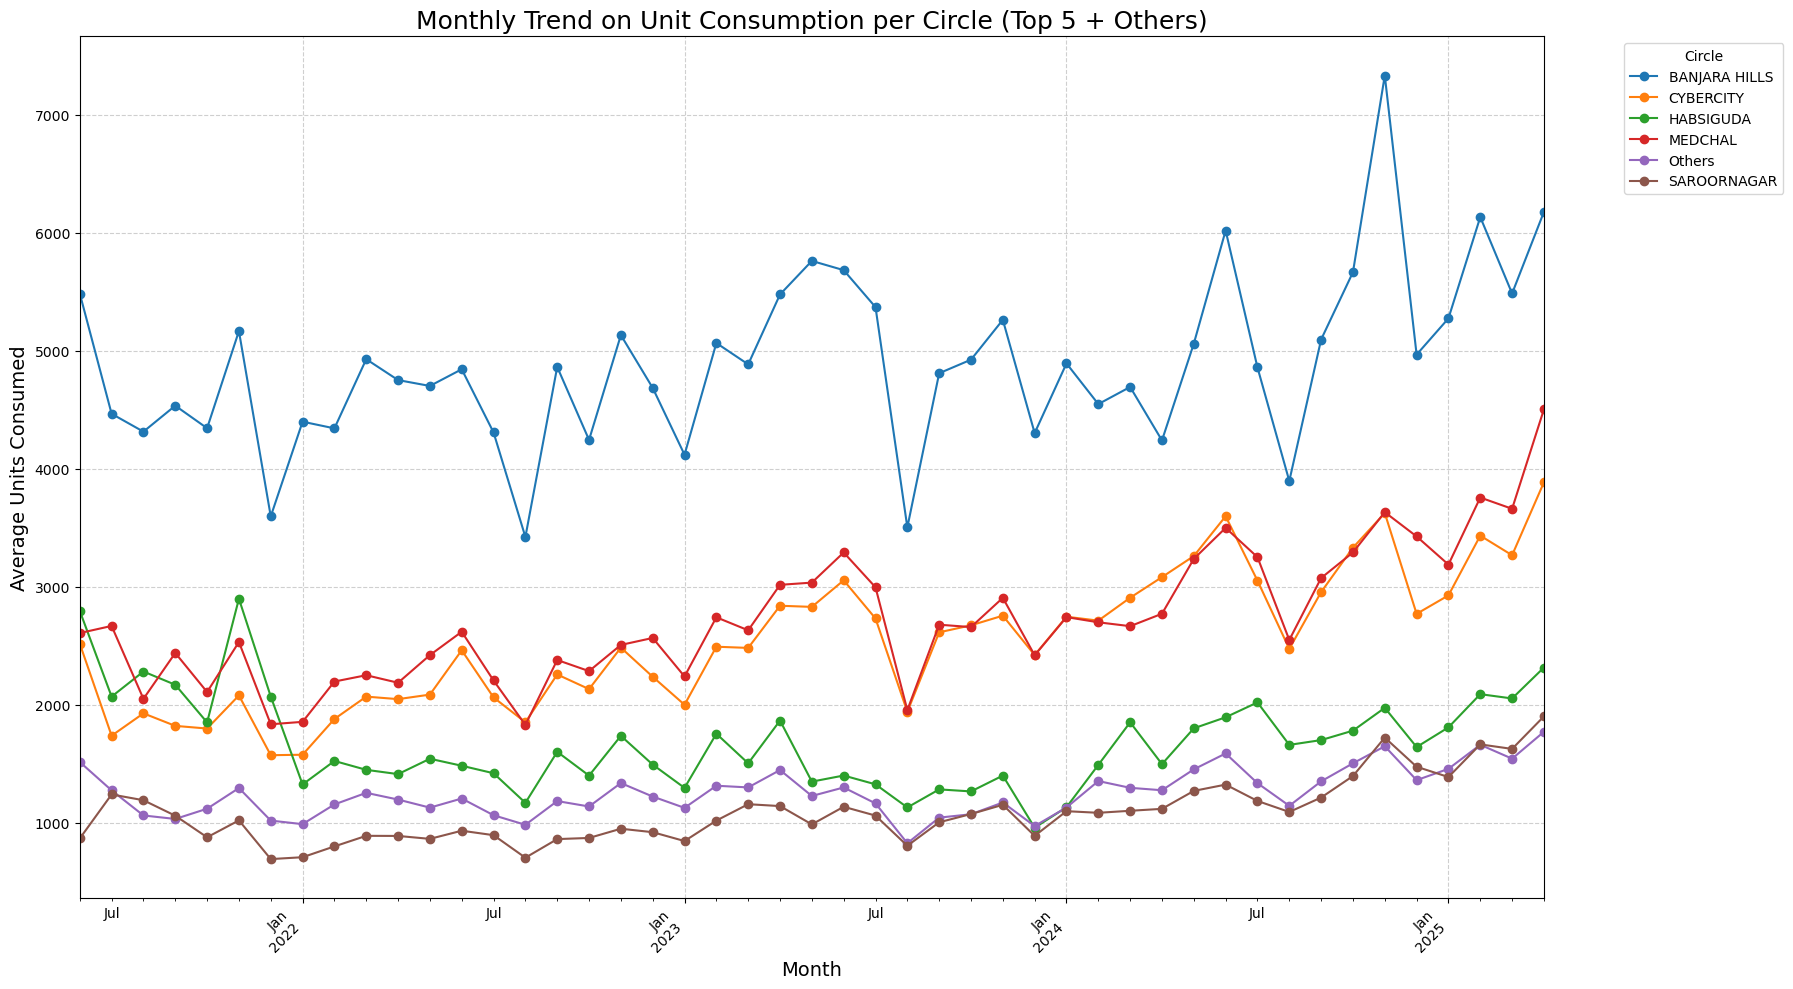

In [30]:
df['Month'] = pd.to_datetime(df['Month'], format='%B %Y')
df = df.dropna(subset=['units'])

top_circles = df.groupby('circle')['units'].sum().nlargest(5).index.tolist()

df['circle_grouped'] = df['circle'].apply(lambda x: x if x in top_circles else 'Others')

monthly_avg_units = df.groupby(['Month', 'circle_grouped'])['units'].mean().reset_index()

pivot_avg = monthly_avg_units.pivot(index='Month', columns='circle_grouped', values='units')

plt.figure(figsize=(16, 10))
pivot_avg.plot(marker='o', figsize=(18, 10))

plt.title('Monthly Trend on Unit Consumption per Circle (Top 5 + Others)', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Units Consumed', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Circle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("Monthly_Solar_Net_Meter_Top5_vs_Others.png")
plt.show()

